# Principal Component Analysis (PCA) on Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
wine=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\wine.csv")

In [3]:
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  Type             178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Alcohol               AxesSubplot(0.125,0.712609;0.168478x0.167391)
Malic              AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Ash                AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Alcalinity         AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Magnesium             AxesSubplot(0.125,0.511739;0.168478x0.167391)
Phenols            AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Flavanoids         AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Nonflavanoids      AxesSubplot(0.731522,0.511739;0.168478x0.167391)
Proanthocyanins        AxesSubplot(0.125,0.31087;0.168478x0.167391)
Color               AxesSubplot(0.327174,0.31087;0.168478x0.167391)
Hue                 AxesSubplot(0.529348,0.31087;0.168478x0.167391)
Dilution            AxesSubplot(0.731522,0.31087;0.168478x0.167391)
Proline                   AxesSubplot(0.125,0.11;0.168478x0.167391)
Type                   AxesSubplot(0.327174,0.11;0.168478x0.167391)
dtype: object

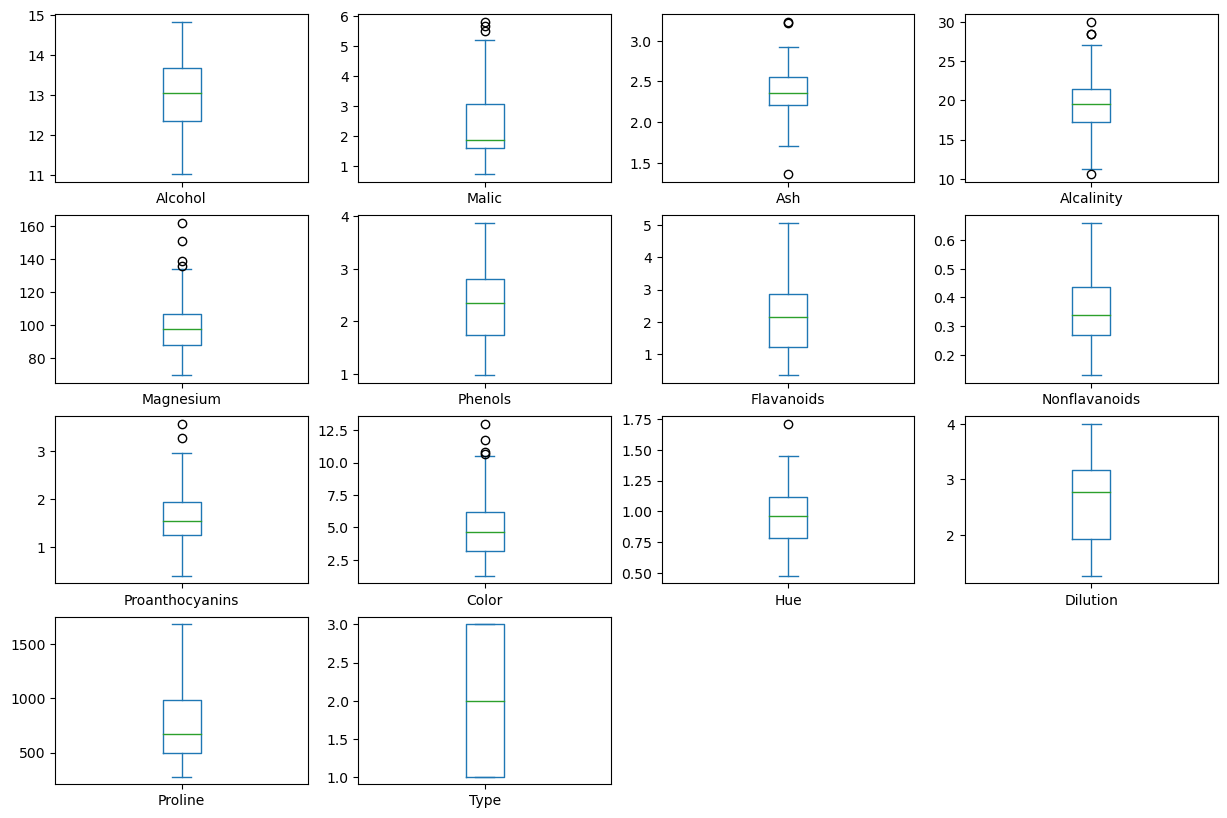

In [6]:
wine.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10)) #Boxplots for each column to find the outliers and Distribution of column

In [7]:
wine.corr() #Correlation between columns 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


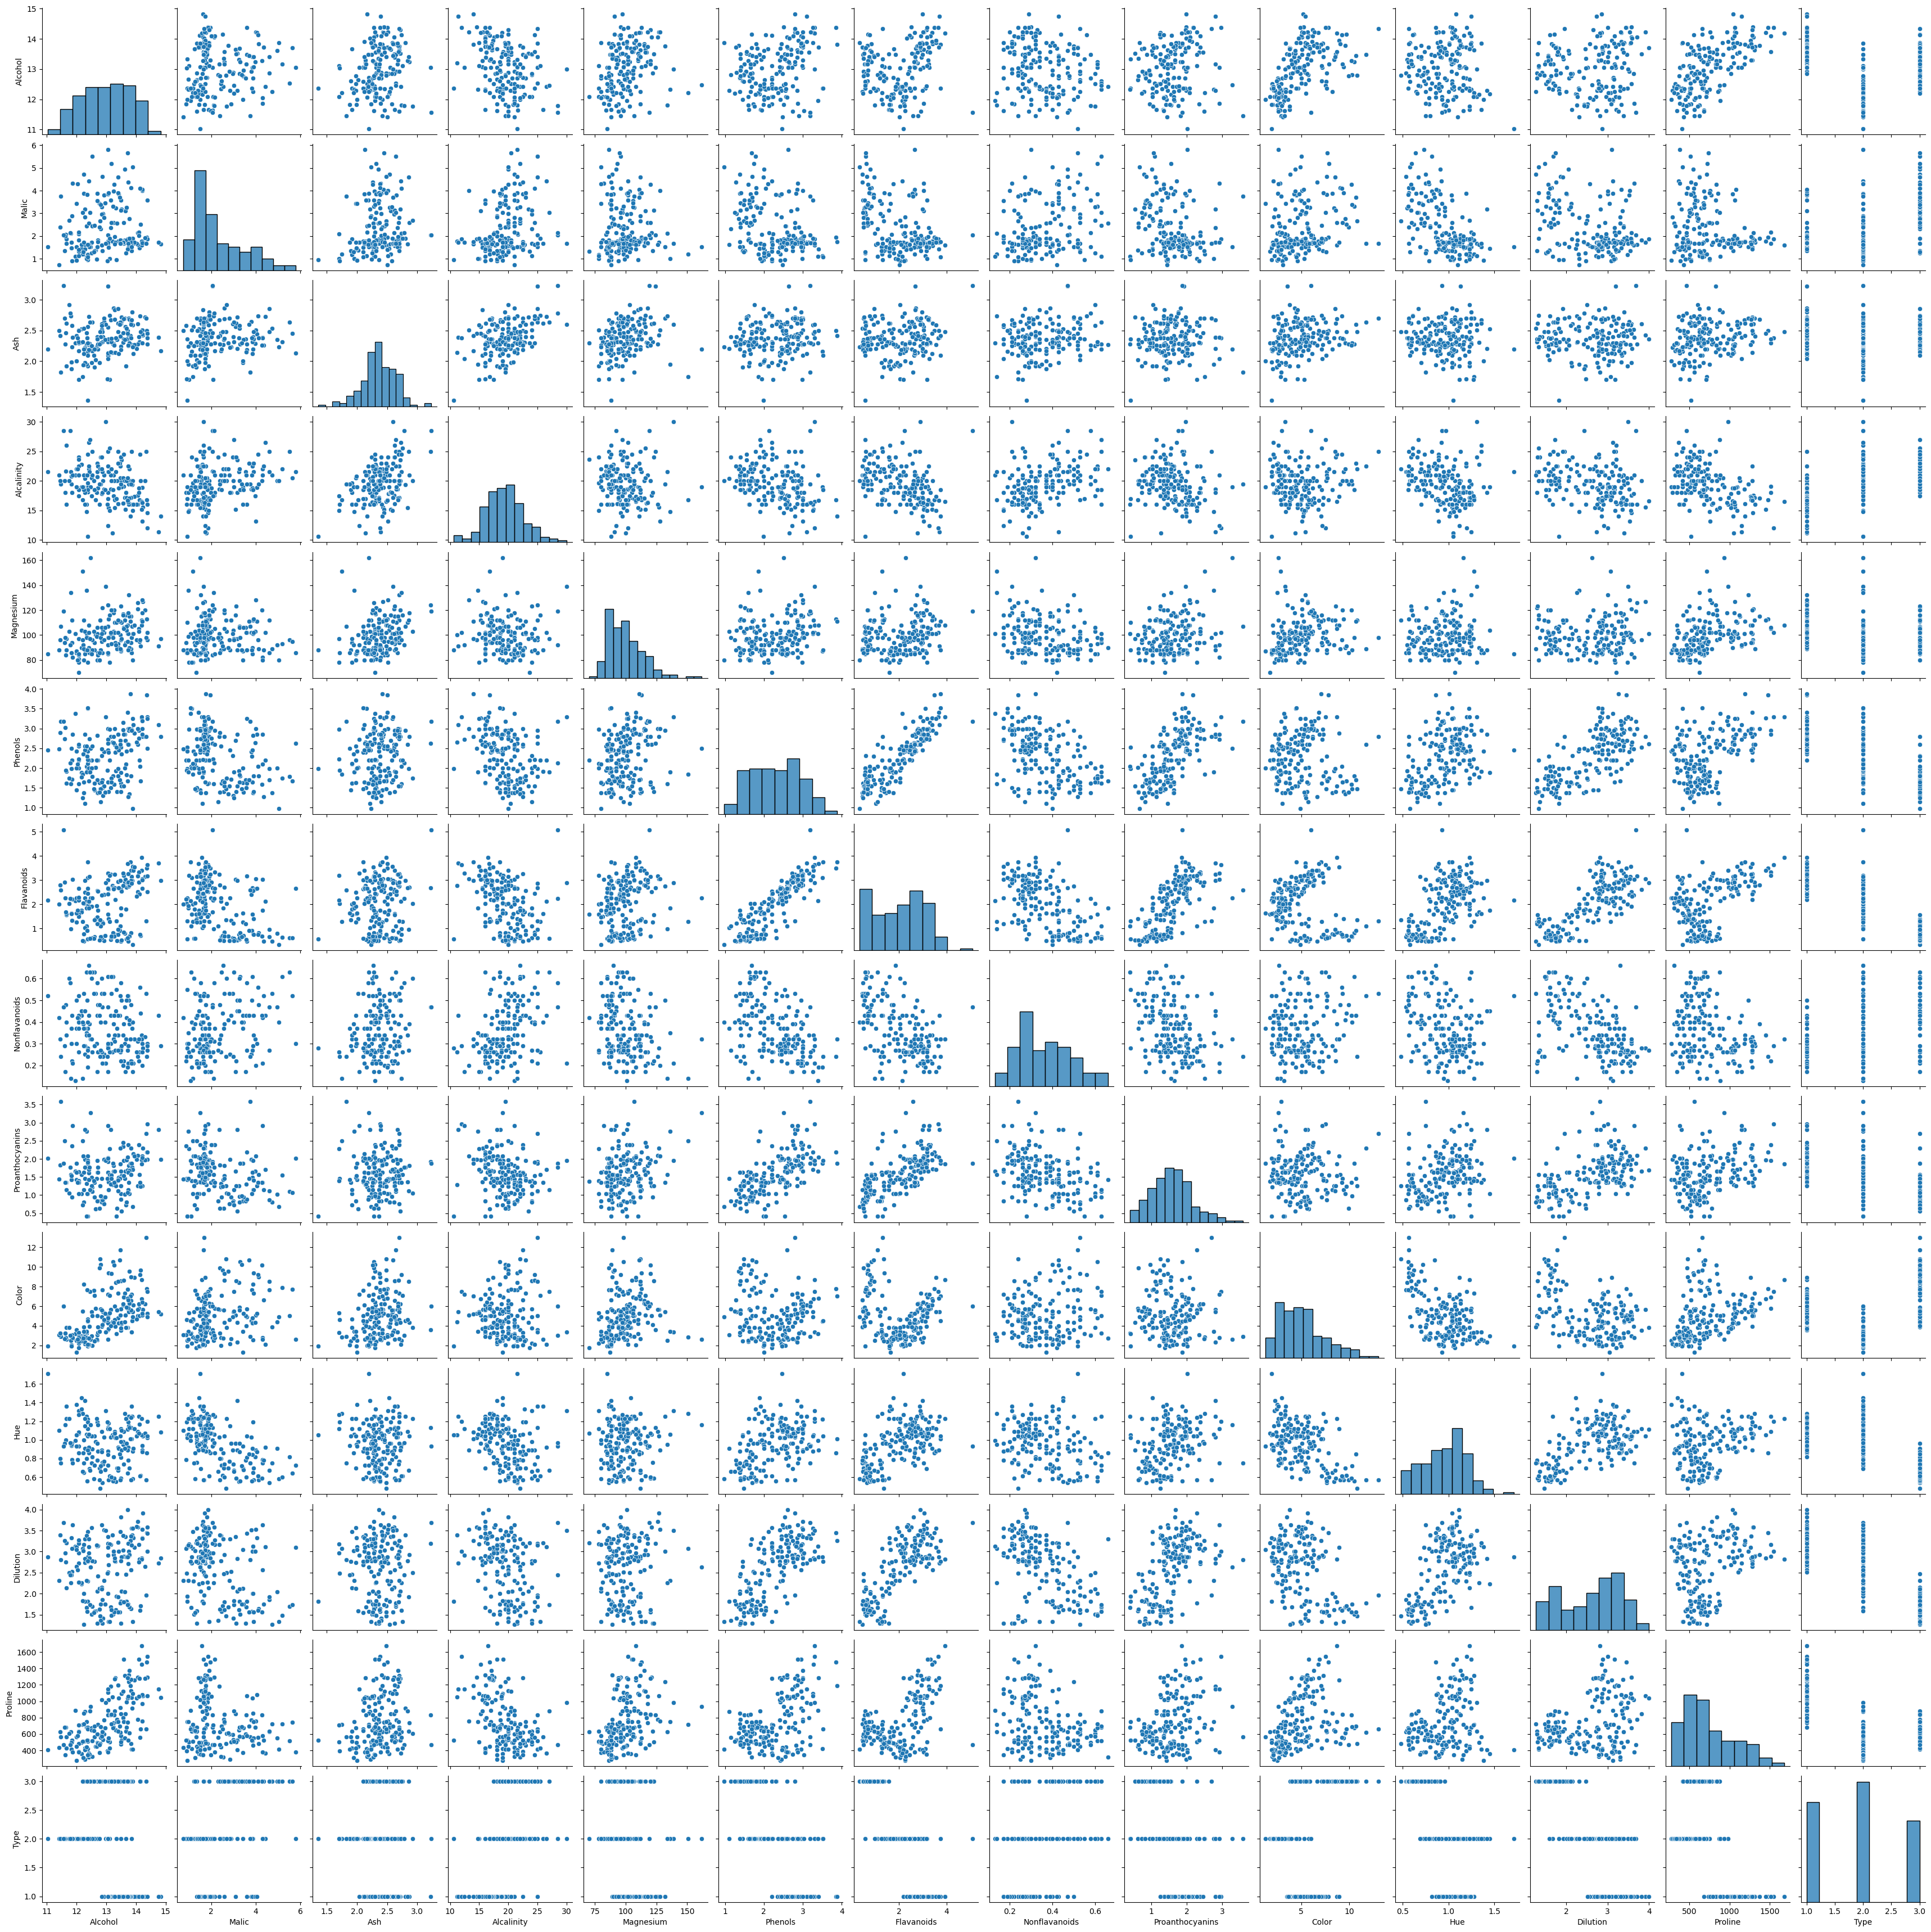

In [8]:
sns.pairplot(wine) #pairplot to se negative , positive or no correlation 

# Hierarchical Clustering

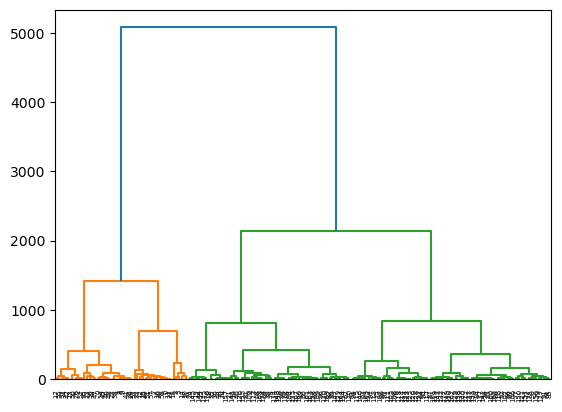

In [9]:
#Dendogram to visualize clusters using Hierarchy
dendrogram=sch.dendrogram(sch.linkage(wine,method='ward'))

In [10]:
wine_hc=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
hc=wine_hc.fit(wine)

In [11]:
np.unique(hc.labels_)

array([0, 1, 2], dtype=int64)

In [12]:
wine['Clusters_hc']=hc.labels_

In [13]:
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type,Clusters_hc
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


# Hierarchical Clustering using PCA

In [14]:
pca=PCA(3)
pca1=pca.fit_transform(wine)


In [15]:
var=pca.explained_variance_ratio_
var

array([9.98083234e-01, 1.73601165e-03, 9.60015213e-05])

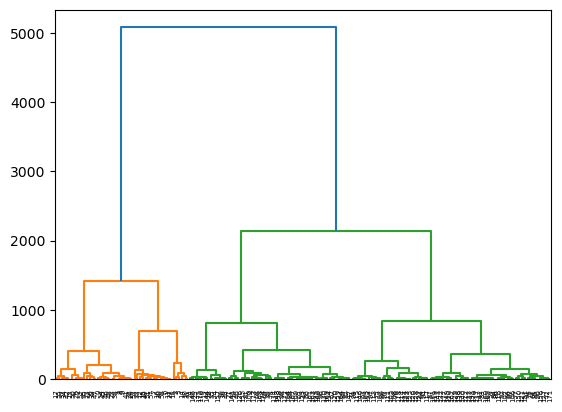

In [16]:
sch_pca=sch.dendrogram(sch.linkage(pca1,method='ward'))

In [17]:
hc_pca=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc_pca.fit(pca1)

AgglomerativeClustering(n_clusters=3)

# Kmeans Clustering 

In [18]:
kmeans=KMeans()

c:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


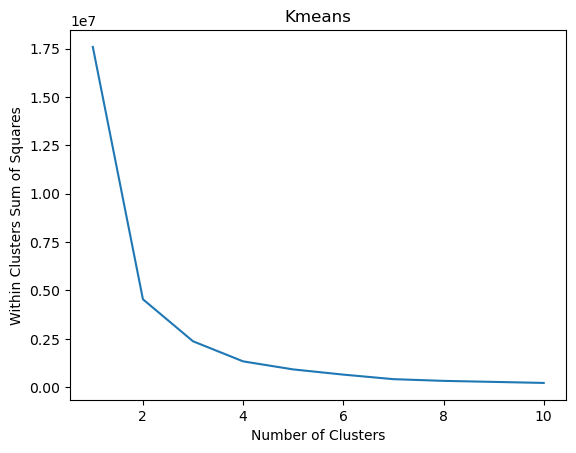

In [19]:
#Elbow Chart to find best K value that is Clusters

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Kmeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()

In [20]:
kmeans1=KMeans(n_clusters=4)
kmeans1.fit(wine)

KMeans(n_clusters=4)

In [21]:
wine['Clusters_kmeans']=kmeans1.labels_

In [22]:
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type,Clusters_hc,Clusters_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,0


# Kmeans Clustering using PCA

In [23]:
kmeans_pca=KMeans()

c:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


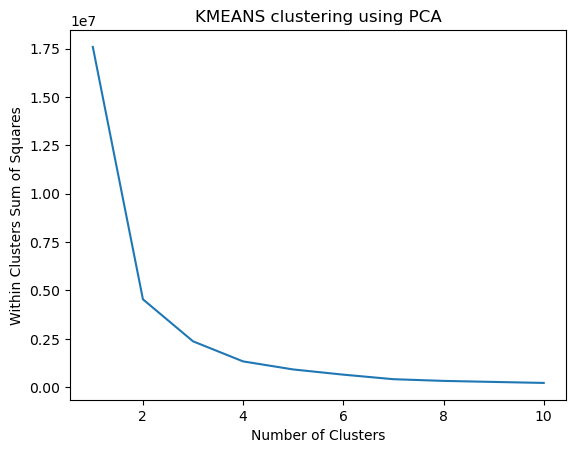

In [24]:
wcss_pca=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,random_state=0)
    kmeans_pca.fit(pca1)
    wcss_pca.append(kmeans_pca.inertia_)
plt.plot(range(1,11),wcss_pca)
plt.title("KMEANS clustering using PCA")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.show()

In [25]:
kmeans_pca1=KMeans(n_clusters=4)
kmeans_pca1.fit(pca1)

KMeans(n_clusters=4)

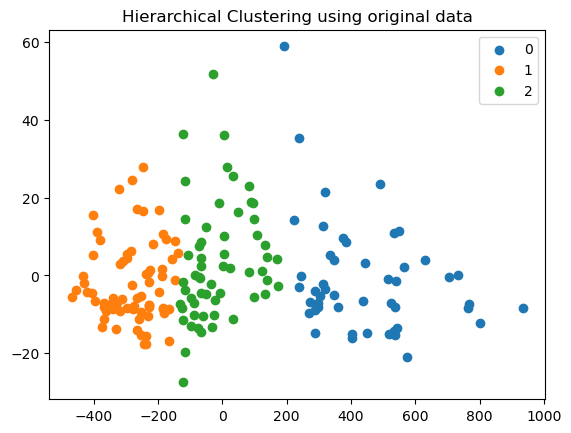

In [26]:
#Plotting Hierarchical Clustering with Original data
d=np.unique(hc.labels_)
for i in d:
    plt.scatter(pca1[hc.labels_==i,0],pca1[hc.labels_==i,1],label=i)
plt.title("Hierarchical Clustering using original data")
plt.legend()
plt.show()

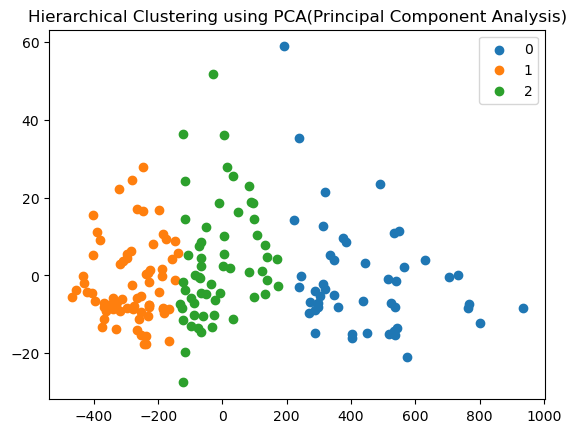

In [27]:
#Plotting Hierarchical Clustering with Principal Components
e= np.unique(hc_pca.labels_)
for i in e:
    plt.scatter(pca1[hc_pca.labels_==i,0],pca1[hc_pca.labels_==i,1],label=i)
plt.title("Hierarchical Clustering using PCA(Principal Component Analysis)")
plt.legend()
plt.show()

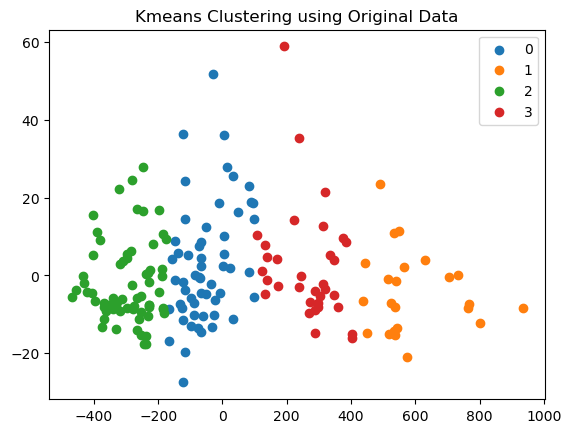

In [28]:
#Plotting KMeans Clustering with Original data
f=np.unique(kmeans1.labels_)
for i in f:
    plt.scatter(pca1[kmeans1.labels_==i,0],pca1[kmeans1.labels_==i,1],label=i)
plt.title("Kmeans Clustering using Original Data")
plt.legend()
plt.show()

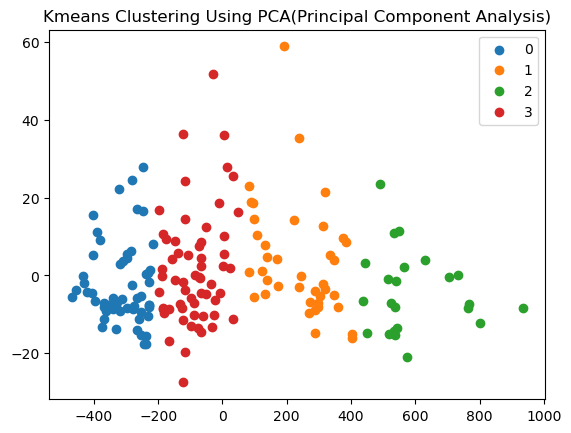

In [29]:
#Plotting KMeans Clustering with Principal Components
g=np.unique(kmeans_pca1.labels_)
for i in g:
    plt.scatter(pca1[kmeans_pca1.labels_==i,0],pca1[kmeans_pca1.labels_==i,1],label=i)
plt.title("Kmeans Clustering Using PCA(Principal Component Analysis)")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
hc_score= silhouette_score(wine,hc.labels_,metric='euclidean')
hc_score

0.5644670355047353

In [31]:
kmeans_score=silhouette_score(wine,kmeans1.labels_,metric='euclidean')
kmeans_score


0.5611541323669061

# Silhoutte score of -1 is low score and 1 means the clusters are correctly divided to their current clusters which shows hierarchical clustering Silhouette score has the good score better than kmeans